In [1]:
import numpy as np
from numpy import pi, log, exp, sqrt, sin, arcsin, sinh, cos, tan, arctan, tanh, arctanh
import matplotlib.pyplot as plt
from pandas import DataFrame as DF

%matplotlib inline

# Chapter 6<br>Ordinary Differential Equations

## 6.5 Variable Step-Size Methods

In [2]:
def RK23(f, a, b, tol, y_0):
    p = 4
    h = b - a
    
    t_i = a
    w_i = np.array(y_0)
    t = [t_i]
    w = [w_i]
        
    while t_i < b:
        s_1 = f(t_i, w_i)
        s_2 = f(t_i + h, w_i + h*s_1)
        s_3 = f(t_i + h/2, w_i + h*(s_1 + s_2)/4)

        w_ii = w_i + h*(s_1 + s_2)/2
        z_ii = w_i + h*(s_1 + 4*s_3 + s_2)/6
        e_i = abs(w_ii - z_ii)
        
        rel_error = abs(np.max(e_i / w_ii))
        if rel_error > tol:
            h = 0.8*pow(tol / rel_error, 1/(p+1)) * h
            continue
        elif t_i + h > b:
            h = b - t_i
            continue
        elif (rel_error < tol/10) & (t_i + h < b):
            h *= 2
            continue

        t_i += h
        w_i = z_ii
        t.append(t_i)
        w.append(w_i)
    
    return t, np.array(w).T

In [3]:
def RKF45(f, a, b, tol, y_0):
    p = 4
    h = b - a
    
    t_i = a
    w_i = np.array(y_0)
    t = [t_i]
    w = [w_i]
        
    k = 0
    while t_i < b:
        k += 1
        s_1 = f(t_i, w_i)
        s_2 = f(t_i + h/4, w_i + h*s_1/4)
        s_3 = f(t_i + h*3/8, w_i + h*s_1*3/32 + h*s_2*9/32)
        s_4 = f(t_i + h*12/13, w_i + h*s_1*1932/2197 - h*s_2*7200/2197 + 
                h*s_3*7296/2197)
        s_5 = f(t_i + h, w_i + h*s_1*439/216 - h*s_2*8 + h*s_3*3680/513 -
               h*s_4*845/4104)
        s_6 = f(t_i + h/2, w_i - h*s_1*8/27 + h*s_2*2 - h*s_3*3544/2565 + 
               h*s_4*1859/4104 - h*s_5*11/40)

        w_ii = w_i + h*(s_1*25/216 + s_3*1408/2565 + s_4*2197/4104 - s_5/5)
        z_ii = w_i + h*(s_1*16/135 + s_3*6656/12825 + s_4*28561/56430 -
                        s_5*9/50 + s_6*2/55)
        e_i = abs(w_ii - z_ii)
        
        rel_error = abs(np.max(e_i / w_ii))
        if rel_error > tol:
            h *= 0.8 * pow(tol / rel_error, 1/(p+1))
            continue
        elif t_i + h > b:
            h = b - t_i
            continue

        t_i += h
        w_i = z_ii
        t.append(t_i)
        w.append(w_i)
        
        if (rel_error < tol/10) & (t_i + 2*h < b):
            h *= 2
    
    return t, np.array(w).T

### Q. 1

In [4]:
tol = 1e-8
a, b = 0, 1
y_0 = 0

t_list = np.linspace(0, 1, 101)

In [5]:
# (a)
def f(t, y):
    return t + y

def exact_sol(t):
    return exp(t) - t - 1

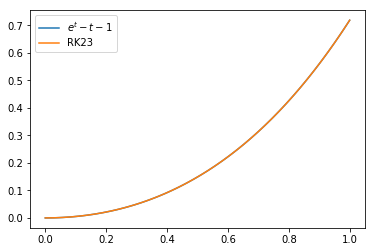

In [6]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$e^t - t - 1$')

t, w = RK23(f, a, b, tol , y_0)
plt.plot(t, w, label="RK23")
    
plt.legend()
plt.show()

In [7]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 1559
Maximum step size used: 0.001775


In [8]:
# (b)
def f(t, y):
    return t - y

def exact_sol(t):
    return exp(-t) + t - 1

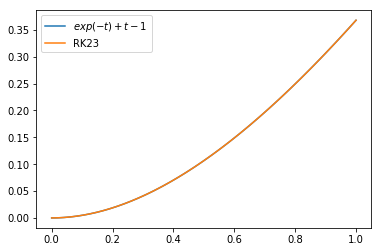

In [9]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp(-t) + t - 1$')

t, w = RK23(f, a, b, tol , y_0)
plt.plot(t, w, label="RK23")
    
plt.legend()
plt.show()

In [10]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 1431
Maximum step size used: 0.003551


In [11]:
# (c)
def f(t, y):
    return 4*t - 2*y

def exact_sol(t):
    return exp(-2*t) + 2*t - 1

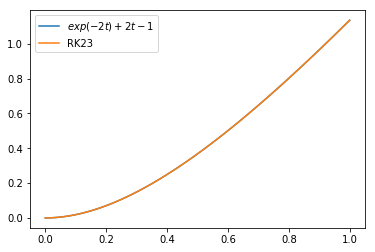

In [12]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp(-2t) + 2t - 1$')

t, w = RK23(f, a, b, tol , y_0)
plt.plot(t, w, label="RK23")
    
plt.legend()
plt.show()

In [13]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 1705
Maximum step size used: 0.001844


### Q. 2

In [14]:
# Omit.

### Q. 3

In [15]:
tol = 1e-8
a, b = 0, 1
y_0 = 0

t_list = np.linspace(0, 1, 101)

In [16]:
# (a)
def f(t, y):
    return t + y

def exact_sol(t):
    return exp(t) - t - 1

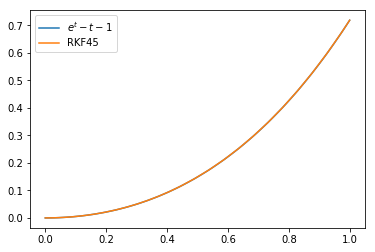

In [17]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$e^t - t - 1$')

t, w = RKF45(f, a, b, tol , y_0)
plt.plot(t, w, label="RKF45")
    
plt.legend()
plt.show()

In [18]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 29
Maximum step size used: 0.048341


In [19]:
# (b)
def f(t, y):
    return t - y

def exact_sol(t):
    return exp(-t) + t - 1

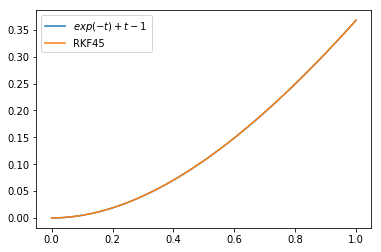

In [20]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp(-t) + t - 1$')

t, w = RKF45(f, a, b, tol , y_0)
plt.plot(t, w, label="RKF45")
    
plt.legend()
plt.show()

In [21]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 26
Maximum step size used: 0.073612


In [22]:
# (c)
def f(t, y):
    return 4*t - 2*y

def exact_sol(t):
    return exp(-2*t) + 2*t - 1

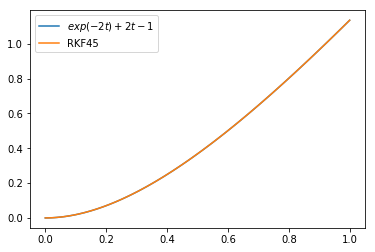

In [23]:
plt.figure()

true_value = exact_sol(t_list)
plt.plot(t_list, true_value, label='$exp(-2t) + 2t - 1$')

t, w = RKF45(f, a, b, tol , y_0)
plt.plot(t, w, label="RKF45")
    
plt.legend()
plt.show()

In [24]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 38
Maximum step size used: 0.051788


### Q. 4

In [25]:
# Omit.

### Q. 5

In [26]:
tol = 1e-6
a, b = 0, 1

t_list = np.linspace(0, 1, 101)

In [27]:
# (a)
y_0 = (1, 0)

def f(t, y):
    y1, y2 = y
    return np.array([y1 + y2, -y1 + y2])

def exact_sol(t):
    return np.array([exp(t)*cos(t), -exp(t)*sin(t)])

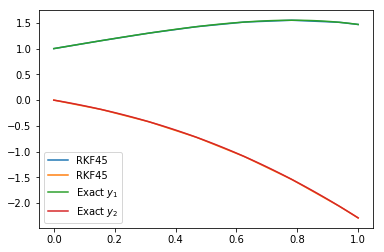

In [28]:
t, y = RKF45(f, a, b, tol, y_0)

plt.plot(t, y[0], label="RKF45")
plt.plot(t, y[1], label="RKF45")
plt.plot(t_list, exact_sol(t_list)[0], label="Exact $y_1$")
plt.plot(t_list, exact_sol(t_list)[1], label="Exact $y_2$")
plt.legend()

plt.show()

In [29]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 8
Maximum step size used: 0.156336


In [30]:
# (b)
y_0 = (1, 0)

def f(t, y):
    y1, y2 = y
    return np.array([-y1 - y2, y1 - y2])

def exact_sol(t):
    return np.array([exp(-t)*cos(t), exp(-t)*sin(t)])

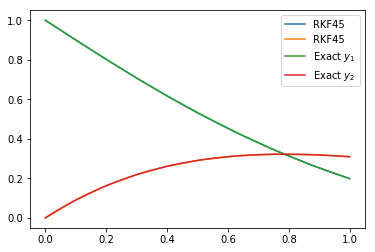

In [31]:
t, y = RKF45(f, a, b, tol, y_0)

plt.plot(t, y[0], label="RKF45")
plt.plot(t, y[1], label="RKF45")
plt.plot(t_list, exact_sol(t_list)[0], label="Exact $y_1$")
plt.plot(t_list, exact_sol(t_list)[1], label="Exact $y_2$")
plt.legend()

plt.show()

In [32]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 11
Maximum step size used: 0.122492


In [33]:
# (c)
y_0 = (1, 0)

def f(t, y):
    y1, y2 = y
    return np.array([-y2, y1])

def exact_sol(t):
    return np.array([cos(t), sin(t)])

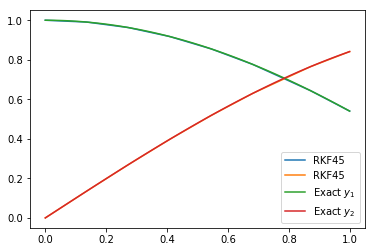

In [34]:
t, y = RKF45(f, a, b, tol, y_0)

plt.plot(t, y[0], label="RKF45")
plt.plot(t, y[1], label="RKF45")
plt.plot(t_list, exact_sol(t_list)[0], label="Exact $y_1$")
plt.plot(t_list, exact_sol(t_list)[1], label="Exact $y_2$")
plt.legend()

plt.show()

In [35]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 8
Maximum step size used: 0.190034


In [36]:
# (d)
y_0 = (5, 0)

def f(t, y):
    y1, y2 = y
    return np.array([y1 + 3*y2, 2*y1 + 2*y2])

def exact_sol(t):
    return np.array([3*exp(-t) + 2*exp(4*t), -2*exp(-t) + 2*exp(4*t)])

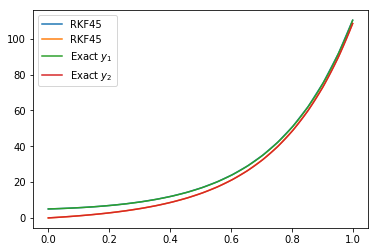

In [37]:
t, y = RKF45(f, a, b, tol, y_0)

plt.plot(t, y[0], label="RKF45")
plt.plot(t, y[1], label="RKF45")
plt.plot(t_list, exact_sol(t_list)[0], label="Exact $y_1$")
plt.plot(t_list, exact_sol(t_list)[1], label="Exact $y_2$")
plt.legend()

plt.show()

In [38]:
t = np.array(t)
max_step_size = max(t[1:] - t[:-1])

print("Number of steps needed: %d" % len(t))
print("Maximum step size used: %f" % max_step_size)

Number of steps needed: 23
Maximum step size used: 0.049727
